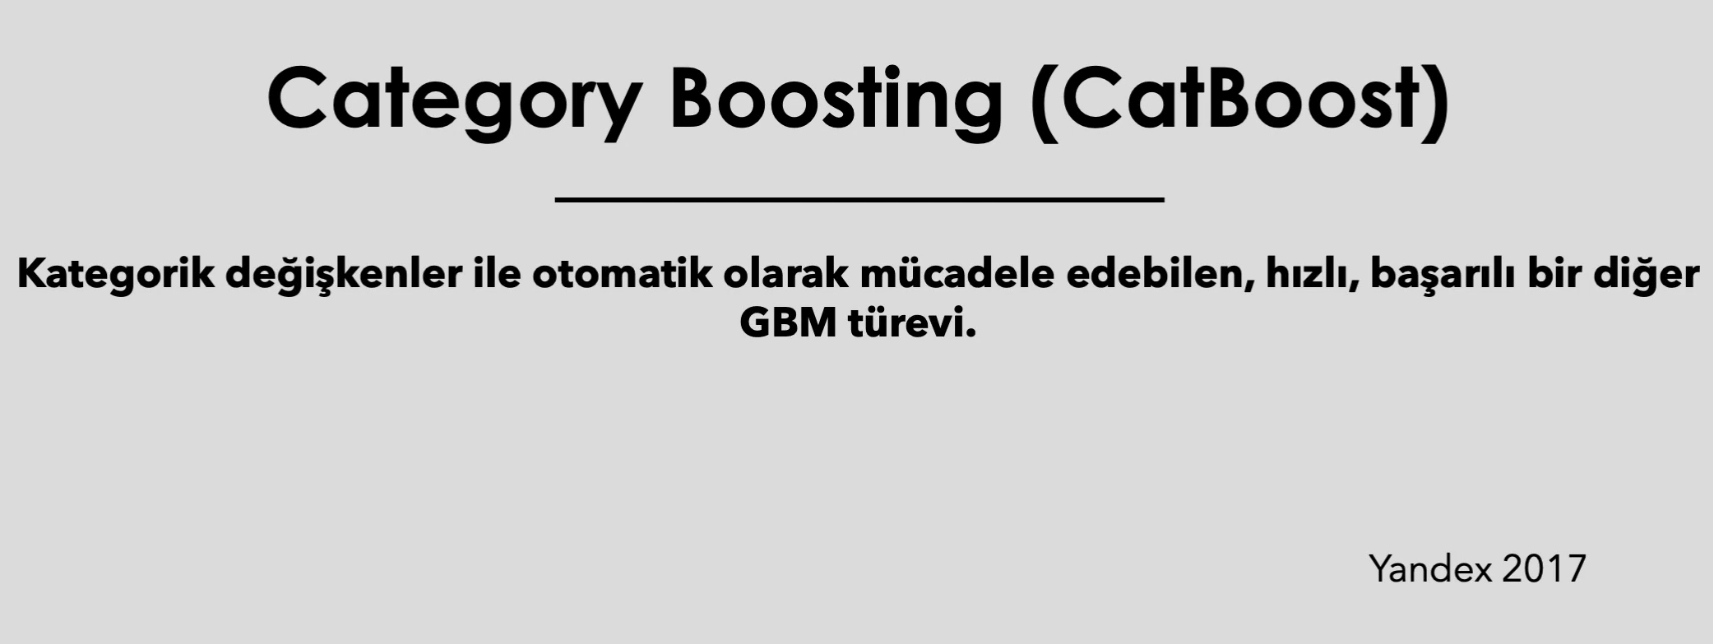

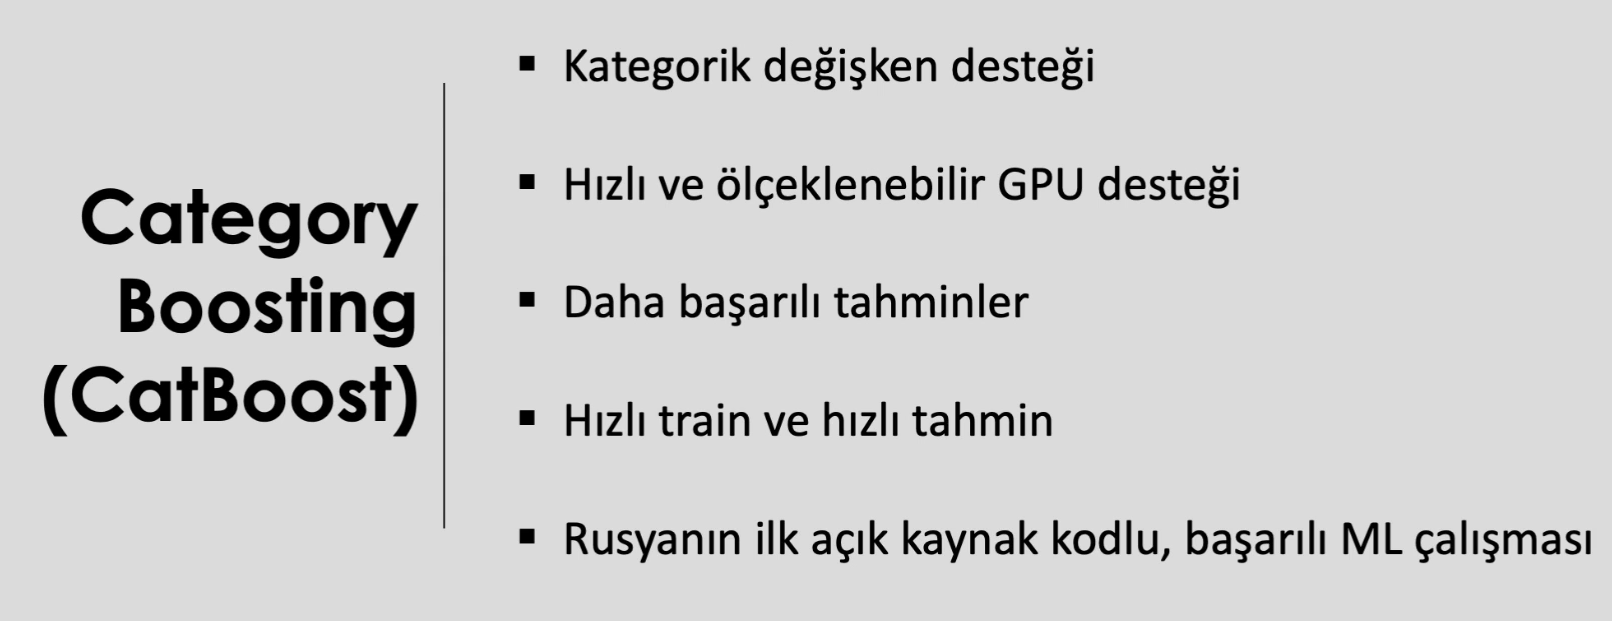

## CatBoost Model

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'],axis=1).astype("float64")
X = pd.concat([X_ ,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X , y, test_size=0.25, random_state=42)

In [3]:
#!pip install catboost

In [4]:
from catboost import CatBoostRegressor

In [5]:
catb= CatBoostRegressor()
catb_model = catb.fit(X_Train, Y_Train)

Learning rate set to 0.031674
0:	learn: 437.6430699	total: 144ms	remaining: 2m 23s
1:	learn: 431.3923642	total: 147ms	remaining: 1m 13s
2:	learn: 424.8820360	total: 149ms	remaining: 49.5s
3:	learn: 418.2514904	total: 152ms	remaining: 37.7s
4:	learn: 412.6394021	total: 154ms	remaining: 30.7s
5:	learn: 406.6247020	total: 157ms	remaining: 26s
6:	learn: 400.5321206	total: 159ms	remaining: 22.6s
7:	learn: 394.6683437	total: 162ms	remaining: 20.1s
8:	learn: 388.2496484	total: 168ms	remaining: 18.4s
9:	learn: 382.9448842	total: 171ms	remaining: 16.9s
10:	learn: 377.2600080	total: 175ms	remaining: 15.7s
11:	learn: 372.4829606	total: 178ms	remaining: 14.7s
12:	learn: 366.6823437	total: 181ms	remaining: 13.7s
13:	learn: 362.6076230	total: 184ms	remaining: 12.9s
14:	learn: 358.0107745	total: 186ms	remaining: 12.2s
15:	learn: 353.2802665	total: 189ms	remaining: 11.6s
16:	learn: 348.5646265	total: 192ms	remaining: 11.1s
17:	learn: 343.6407912	total: 196ms	remaining: 10.7s
18:	learn: 339.2363847	tot

### Tahmin

In [6]:
y_pred = catb_model.predict(X_Test)
np.sqrt(mean_squared_error(Y_Test, y_pred))

351.194631344607

### Model Tuning

In [7]:
catb_grid = {
    'iterations' : [200,500,1000,2000],
    'learning_rate' : [0.01, 0.03, 0.05, 0.1],
    'depth' : [3,4,5,6,7,8]
}

In [8]:
catb = CatBoostRegressor()
catb_cv_model = GridSearchCV(catb, catb_grid, cv=5, n_jobs=-1, verbose=2)

In [ ]:
catb_cv_model.fit(X_Train,Y_Train) #CatBoost 45 dakika falana sürüyor sakın basma ::D

In [ ]:
catb_cv_model.best_params_ #üstteki kodu çalıştırmadan çalışmaz :D

In [10]:
catb_tuned = CatBoostRegressor(iterations = 200,
                               learning_rate=0.01, # Bu değerleri üstteki best_params_ dan almamız lazım
                               depth=8)
catb_tuned = catb_tuned.fit(X_Train, Y_Train)

0:	learn: 442.4903140	total: 7.16ms	remaining: 1.42s
1:	learn: 440.4621805	total: 14.7ms	remaining: 1.45s
2:	learn: 438.5132091	total: 21.4ms	remaining: 1.41s
3:	learn: 436.2180377	total: 30.2ms	remaining: 1.48s
4:	learn: 434.0461579	total: 41.5ms	remaining: 1.62s
5:	learn: 431.8437770	total: 49.8ms	remaining: 1.61s
6:	learn: 430.1594587	total: 56.6ms	remaining: 1.56s
7:	learn: 428.0941830	total: 64.1ms	remaining: 1.54s
8:	learn: 426.0998774	total: 71ms	remaining: 1.5s
9:	learn: 424.0249067	total: 72.4ms	remaining: 1.37s
10:	learn: 422.1921868	total: 79.3ms	remaining: 1.36s
11:	learn: 420.2506764	total: 85.3ms	remaining: 1.34s
12:	learn: 418.3116383	total: 91.3ms	remaining: 1.31s
13:	learn: 416.2966847	total: 98.2ms	remaining: 1.3s
14:	learn: 414.5776175	total: 104ms	remaining: 1.28s
15:	learn: 412.8009394	total: 111ms	remaining: 1.28s
16:	learn: 410.9774146	total: 117ms	remaining: 1.26s
17:	learn: 409.1047417	total: 124ms	remaining: 1.26s
18:	learn: 407.6243957	total: 132ms	remaining:

In [11]:
y_pred = catb_tuned.predict(X_Test)
np.sqrt(mean_squared_error(Y_Test, y_pred))

369.6970696250705